In [8]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [9]:
# Read the data
data1 = pd.read_csv('California_Housing_Data_Part1.csv')

In [10]:
# Train-test split
data1_indep = data1.drop("median_house_value", axis=1)
data1_dep = data1["median_house_value"].copy()

X_train, X_test, y_train, y_test = train_test_split(data1_indep, data1_dep, test_size=0.2, shuffle=False)

In [11]:
# Scale y_train and y_test
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

MSE for Linear Regression:  0.38144299946197463


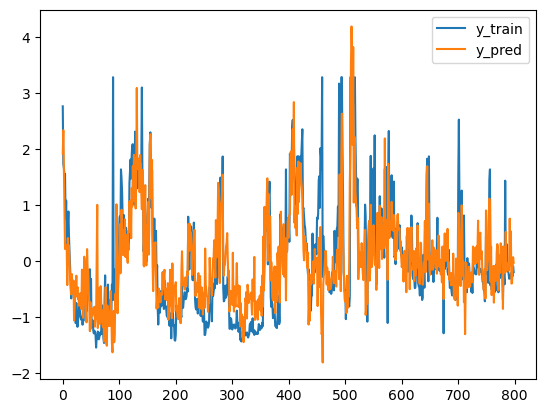

In [12]:
# Create a pipeline for Linear Regression
pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

# Fit the pipeline and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print("MSE for Linear Regression: ", mse)

# Visualize the y_pred and y_train
plt.plot(y_train, label='y_train')
plt.plot(y_pred, label='y_pred')
plt.legend()
plt.show()

MSE for Linear Regression on test data:  0.2548220782547292


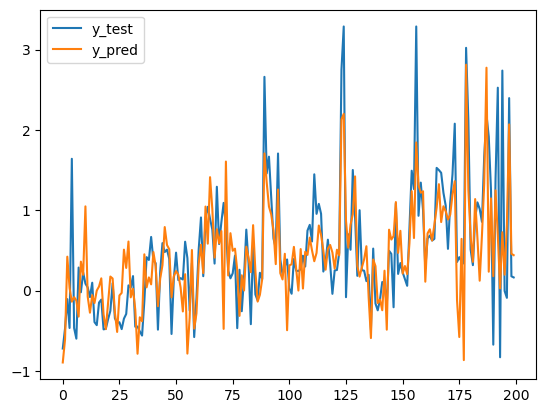

In [13]:
# Test the model (Linear Regression) on test data
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE for Linear Regression on test data: ", mse)

# Visualize the y_pred and y_test
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')
plt.legend()
plt.show()

MSE for Linear Regression on test data:  2112311632.3513937


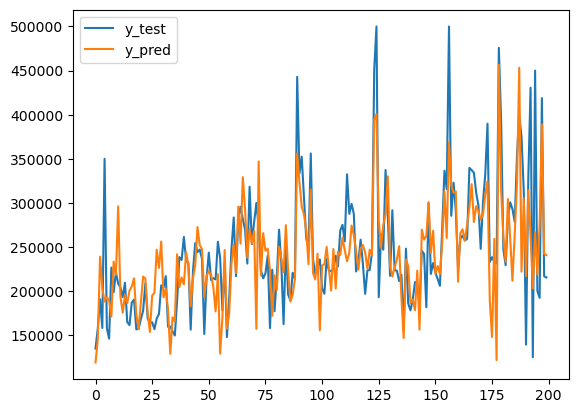

In [14]:
# Predict the median_house_value using original scale
y_pred = pipeline.predict(X_test)

# Inverse transform the y_pred and y_test to original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("MSE for Linear Regression on test data: ", mse)

# Visualize the y_pred and y_test
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')
plt.legend()
plt.show()